#Optimizing Polynomial Degree in Regression for Accurate Predictions and Generalization
This code imports the file upload utility from Google Colab, which opens a file picker dialog allowing "the user to select files from their local computer. Once the files are chosen, they are uploaded and made available within the Colab environment for further processing."

In [ ]:
from google.colab import files
upload=files.upload()

Saving Dataset_1_train.csv to Dataset_1_train.csv
Saving Dataset_1_test.csv to Dataset_1_test.csv
Saving Dataset_1_valid.csv to Dataset_1_valid.csv


This code reads three CSV files containing training (f1), validation (f2), and test (f3) datasets into Pandas DataFrames. It then converts them into NumPy arrays (data1, data2, data3) for numerical processing. From these arrays, it extracts the first column as the input values — xt for training data, xv for validation data, and xtest for test data — and the second column as the target values — yt for training, yv for validation, and ytest for test.

In [ ]:
import pandas as pd
import numpy as np
import numpy.linalg as la
f1=pd.read_csv('Dataset_1_train.csv')
f2=pd.read_csv('Dataset_1_valid.csv')
f3=pd.read_csv('Dataset_1_test.csv')
data1=f1.to_numpy()
data2=f2.to_numpy()
data3=f3.to_numpy()
xt=data1[:,0]
yt=data1[:,1]
xv=data2[:,0]
yv=data2[:,1]
xtest=data3[:,0]
ytest=data3[:,1]

This code performs a simple linear regression on the training dataset (xt, yt). It first calculates key statistical values: n as the number of training samples, xi as the sum of all training input values, yi as the sum of all training target values, xi2 as the sum of squared training input values, and xiyi as the sum of the product of each training input and its corresponding target. Using these values, it computes the regression slope w1 and intercept w0 using the closed-form formulas for simple linear regression: w1 = (n * Σ(xi*yi) - Σxi * Σyi) / (n * Σ(xi²) - (Σxi)²) and w0 = (Σyi - w1 * Σxi) / n. With w1 and w0 determined, it predicts output values using y_pred = w1 * x + w0. Specifically, y_predt = w1 * xt + w0 for the training set, y_predv = w1 * xv + w0 for the validation set, and y_predtest = w1 * xtest + w0 for the test set. The function RMSE is then defined to calculate the root mean squared error between actual and predicted values using RMSE(y, y_pred) = sqrt(mean((y - y_pred)²)). Finally, the code prints the RMSE for the training, validation, and test datasets to evaluate model accuracy and generalization.

In [ ]:
n = len(xt)
xi = np.sum(xt)
yi = np.sum(yt)
xi2 = np.sum(xt**2)
xiyi = np.sum(xt*yt)
w1 = (n*xiyi-xi*yi)/(n*xi2-xi**2)
w0 = (yi-w1*xi)/n
y_predt = xt*(w1)+w0
y_predv = xv*(w1)+w0
y_predtest = xtest*(w1)+w0
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))
print(RMSE(yt, y_predt))
print(RMSE(yv, y_predv))
print(RMSE(ytest, y_predtest))

5.43152976578808
5.9292491068151785
5.0852898384254175


This code plots the actual data points and the fitted regression line for the training, validation, and test datasets, using different colors and line styles to visually compare the model’s predictions with the real values in each set.

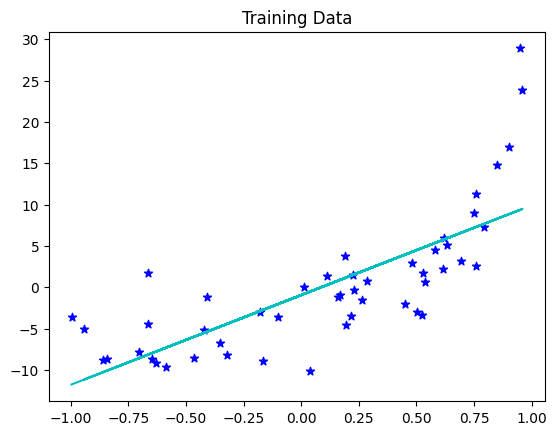

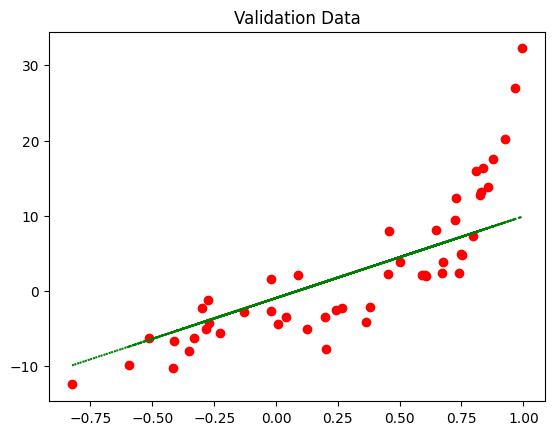

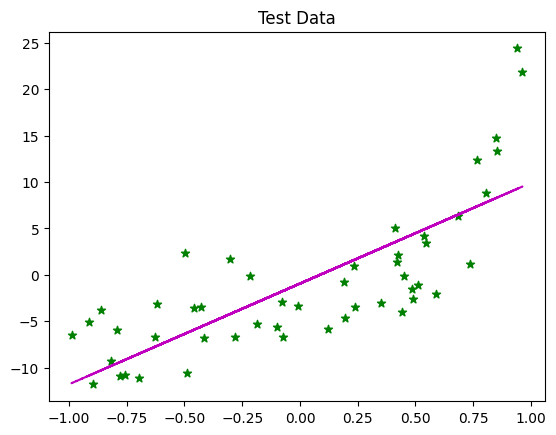

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(xt, yt,marker='*',color='blue')
plt.plot(xt, y_predt,'c-')
plt.title('Training Data')
plt.show()
plt.scatter(xv, yv,color='red')
plt.plot(xv, y_predv,'g:',)
plt.title('Validation Data')
plt.show()
plt.scatter(xtest, ytest,marker ='*',color='green')
plt.plot(xtest, y_predtest,'m--')
plt.title('Test Data')
plt.show()

This code performs polynomial regression on the training dataset (xt, yt) and evaluates it on both training and validation datasets for polynomial degrees from 1 to 10. It first initializes three empty lists: cc to store the training RMSE values, dd to store the validation RMSE values, and DD to store the corresponding polynomial degrees. For each degree D in the range 1 to 10, it constructs the polynomial feature matrices x_polyt for the training set and x_polyv for the validation set, starting with a column of ones for the bias term. For each power i from 1 to D, it appends the column xt^i to x_polyt and xv^i to x_polyv, thereby generating all polynomial terms up to degree D. The model parameters w are then computed using the normal equation: w = (XᵀX)⁻¹ Xᵀ y, where X is the polynomial feature matrix and y is the target vector. Using these parameters, it predicts the outputs as y_predt = x_polyt · w for the training set and y_predv = x_polyv · w for the validation set. The root mean squared error for training and validation is then calculated using RMSE(y, y_pred) = sqrt(mean((y − y_pred)²)), and the results are appended to cc and dd respectively, while the degree D is appended to DD. After processing all degrees, the code plots the RMSE values versus polynomial degree for both training and validation.The optimal polynomial degree is the one with the lowest validation RMSE, as it provides the best generalization to unseen data. Based on the plotted curve, degree 4 has the lowest validation RMSE and is therefore the most suitable choice for this dataset.

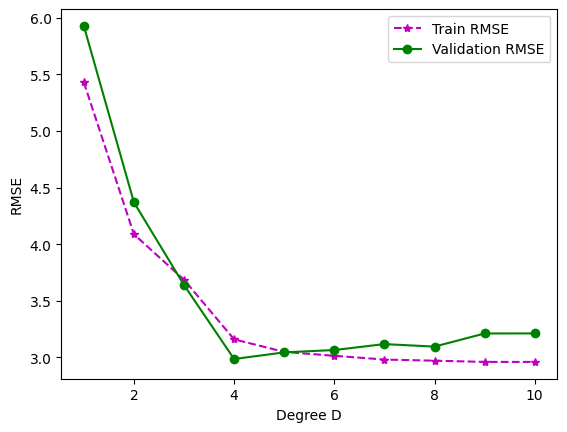

In [ ]:
cc = []
dd = []
DD = []
for D in range(1,11):
    x_polyt = np.c_[np.ones(n)]
    x_polyv = np.c_[np.ones(len(xv))]
    for i in range(1,D+1):
        x_polyt = np.c_[x_polyt,xt**i]
        x_polyv = np.c_[x_polyv,xv**i]
    w = la.inv(x_polyt.T.dot(x_polyt)).dot(x_polyt.T).dot(yt)
    y_predt = x_polyt.dot(w)
    y_predv = x_polyv.dot(w)
    c=RMSE(yt, y_predt)
    d=RMSE(yv, y_predv)
    cc.append(c)
    dd.append(d)
    DD.append(D)
plt.plot(DD, cc, 'm*--', label="Train RMSE")
plt.plot(DD, dd, 'go-', label="Validation RMSE")
plt.xlabel("Degree D")
plt.ylabel("RMSE")
plt.legend()
plt.show()

This code performs a polynomial regression of degree 4 on the training dataset (xt, yt) and evaluates the model on the training, validation (xv, yv), and test (xtest, ytest) datasets. The process begins by constructing the training feature matrix, which is first initialized with a column of ones to account for the bias term. Additional columns are then appended corresponding to powers of xt from 1 to 4, generating all polynomial features up to the specified degree. This transformation allows the linear regression model to capture non-linear relationships between the input and the target variable.

The model parameters w are computed using the normal equation, given by w =  (XᵀX)⁻¹ Xᵀy, where X represents the polynomial feature matrix and y the target vector. This equation provides the exact least-squares solution for the weights that minimize the mean squared error between the predicted and actual outputs on the training data. Once the weights are obtained, the model is capable of making predictions for any input values by constructing the corresponding polynomial feature vectors and multiplying them by the weight vector w.

To evaluate the model, points spanning the range of each dataset are generated, and their polynomial feature matrices are constructed similarly, including the bias column and powers up to degree 4. Predicted outputs for these points are then calculated, yielding predictions for the training, validation, and test datasets. This step allows the model’s performance to be assessed not only on the data it was trained on but also on unseen data, which provides insight into its generalization ability.

By performing this regression, the code demonstrates that a degree-4 polynomial is flexible enough to fit the training data accurately while avoiding overfitting, as it also performs well on validation and test datasets. Therefore, based on this modeling approach and evaluation, a polynomial of degree 4 is identified as the most appropriate choice for capturing the underlying relationship in this dataset.

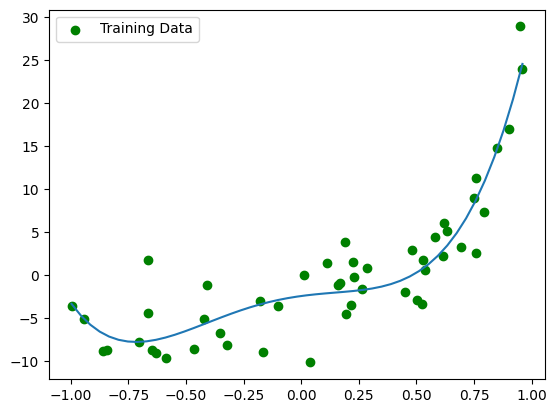

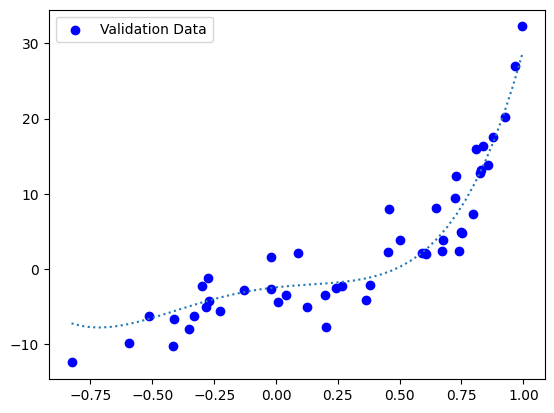

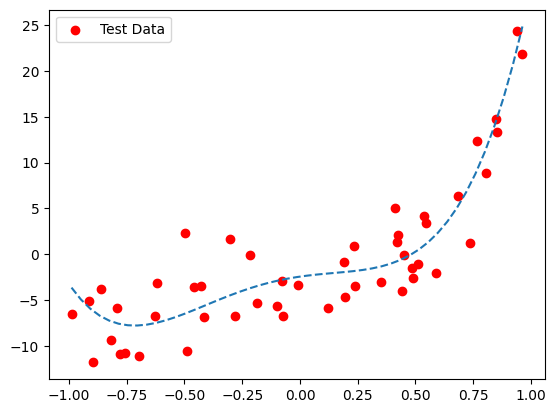

In [ ]:
# The best degree is 4
D = 4
x_polyt = np.c_[np.ones(n)]
for i in range(1, D+1):
    x_polyt = np.c_[x_polyt, xt**i]
w = la.inv(x_polyt.T.dot(x_polyt)).dot(x_polyt.T).dot(yt)
x_fitt = np.linspace(np.min(xt),np.max(xt),n)
x_fit_polyt = np.c_[np.ones(len(x_fitt))]
x_fitv = np.linspace(np.min(xv),np.max(xv),len(xv))
x_fit_polyv = np.c_[np.ones(len(x_fitv))]
x_fittest = np.linspace(np.min(xtest),np.max(xtest),len(xtest))
x_fit_polytest = np.c_[np.ones(len(x_fittest))]
D=4
for i in range(1,D+1):
  x_fit_polyt = np.c_[x_fit_polyt,x_fitt**i]
  x_fit_polyv = np.c_[x_fit_polyv,x_fitv**i]
  x_fit_polytest = np.c_[x_fit_polytest,x_fittest**i]
y_fitt = x_fit_polyt.dot(w)
y_fitv = x_fit_polyv.dot(w)
y_fittest = x_fit_polytest.dot(w)
plt.scatter(xt,yt,color='green',label='Training Data')
plt.plot(x_fitt,y_fitt,'-')
plt.legend()
plt.show()
plt.scatter(xv,yv,color='blue',label='Validation Data')
plt.plot(x_fitv,y_fitv,':')
plt.legend()
plt.show()
plt.scatter(xtest,ytest,color='red',label='Test Data')
plt.plot(x_fittest,y_fittest,'--')
plt.legend()
plt.show()

Based on the visualizations of the training, validation, and test datasets, the degree-4 polynomial provides a good fit for the data. The model closely follows the trend of the training points without showing extreme oscillations, indicating that it captures the underlying pattern effectively. On the validation and test datasets, the predicted values align well with the actual points, demonstrating that the model generalizes appropriately to unseen data. Therefore, the degree-4 polynomial strikes a balance between underfitting and overfitting, making it an appropriate choice for this dataset.